필요한 라이브러리를 읽습니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('./draft78.csv')
data

,Pick,Player,Yrs,Draft
0,1,Mychal Thompson,12.0,1978
1,2,Phil Ford,7.0,1978
2,3,Rick Robey,8.0,1978
3,4,Micheal Ray Richardson,8.0,1978
4,5,Purvis Short,12.0,1978
...,...,...,...,...
3637,56,Branden Dawson,1.0,2015
3638,57,Nikola Radicevic,NaN,2015
3639,58,J.P. Tokoto,NaN,2015
3640,59,Dimitrios Agravanis,NaN,2015


데이터의 개요를 보겠습니다.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pick    3642 non-null   int64  
 1   Player  3642 non-null   object 
 2   Yrs     1983 non-null   float64
 3   Draft   3642 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 113.9+ KB


Yrs는 NBA에서 활동한 시간인데, Draft로 뽑혀 1년도 안돼 경기를 못뛴 선수를 의미합니다. 
이 선수들은 1년채 못뛰었다는 의미로 1년을 넣고 나머지 선수의 년도를 1년씩 더하겠습니다.

In [4]:
data['Yrs']=data['Yrs']+1
data=data.fillna(1.0)
data

,Pick,Player,Yrs,Draft
0,1,Mychal Thompson,13.0,1978
1,2,Phil Ford,8.0,1978
2,3,Rick Robey,9.0,1978
3,4,Micheal Ray Richardson,9.0,1978
4,5,Purvis Short,13.0,1978
...,...,...,...,...
3637,56,Branden Dawson,2.0,2015
3638,57,Nikola Radicevic,1.0,2015
3639,58,J.P. Tokoto,1.0,2015
3640,59,Dimitrios Agravanis,1.0,2015


중복된 값도 제거합니다.

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,Pick,Yrs,Draft
count,3642.000000,3642.000000,3642.000000
mean,69.879462,4.377265,1990.973641
std,58.918655,4.648290,11.251042
min,1.000000,1.000000,1978.000000
25%,24.000000,1.000000,1982.000000
50%,48.000000,2.000000,1986.000000
75%,110.000000,7.000000,2000.000000
max,228.000000,22.000000,2015.000000


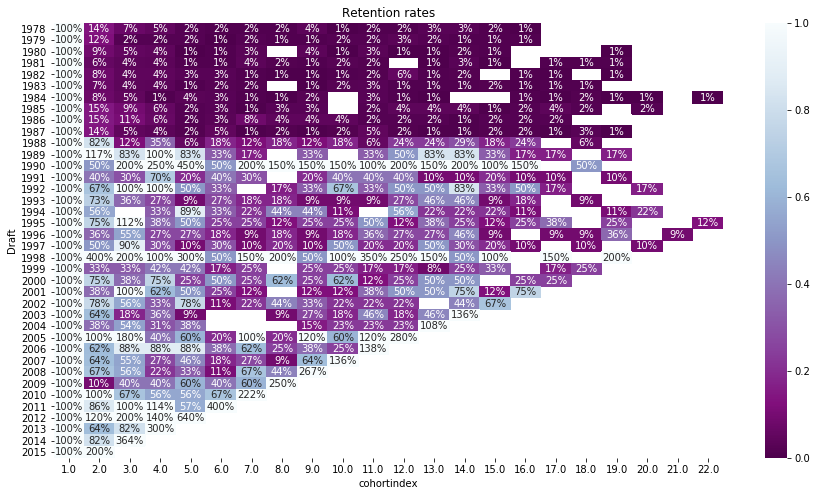

In [11]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax =1,cmap="BuPu_r")
plt.show()

미리 해봤는데 98년도를 보면 다음년도에 더 많이 뛰는 이상한 결과가 나왔습니다.  
데이터를 보니 단순 연도를 통해 계산해서 누적합이 아니라 낱개데이터 때문에 그렇습니다. 

In [59]:
# 누적합을 구하는 알고리즘입니다.
def sum_list(l):
    m=0
    k=[]
    for o in l:
        m+=o
        n=m
        k.append(n)
    return k

# 배열의 누적합을 적용하여 Draft,Yrs 데이터를 모았습니다.
def get_count(df):
    b=[]
    for i in range(1978,2016):
        df2=df[df['Draft']==i]
        max_year=df2.Yrs.max().astype('int')
        a=[]
        for j in range(max_year,-1,-1):
            a.append(len(df2[df2['Yrs']==j]))
        b.append((sum_list(a)))
    return b

# 당연히 뒤집어 있기에 한번 뒤집어 줬습니다.
cohortreverse=get_count(data)
cohortreal=[]
for i in cohortreverse:
    cohortreal.append(list(reversed(i)))
    
#dataframe을 생성합니다.
cohortframe=pd.DataFrame(data=cohortreal,index=data['Draft'].unique(),columns=range(0,23))
cohortframe

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1978,202,202,66,47.0,37.0,30.0,27.0,25.0,23.0,21.0,...,11.0,7.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1979,202,202,55,37.0,34.0,31.0,28.0,27.0,24.0,22.0,...,9.0,6.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1980,214,214,57,43.0,35.0,28.0,27.0,25.0,20.0,20.0,...,7.0,6.0,3.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
1981,223,223,58,48.0,41.0,35.0,33.0,31.0,25.0,22.0,...,13.0,12.0,7.0,6.0,6.0,4.0,2.0,NaN,NaN,NaN
1982,225,225,64,51.0,44.0,37.0,32.0,27.0,25.0,24.0,...,9.0,7.0,4.0,4.0,2.0,1.0,1.0,NaN,NaN,NaN
1983,226,226,58,46.0,39.0,33.0,31.0,27.0,24.0,24.0,...,12.0,10.0,8.0,5.0,4.0,2.0,NaN,NaN,NaN,NaN
1984,228,228,58,45.0,37.0,35.0,29.0,24.0,22.0,21.0,...,10.0,9.0,9.0,9.0,7.0,6.0,3.0,2.0,1.0,1.0
1985,162,162,66,52.0,43.0,37.0,35.0,32.0,31.0,28.0,...,19.0,15.0,11.0,10.0,8.0,4.0,2.0,2.0,NaN,NaN
1986,162,162,68,54.0,44.0,38.0,36.0,33.0,25.0,21.0,...,9.0,7.0,6.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
1987,161,161,55,40.0,35.0,31.0,29.0,24.0,23.0,21.0,...,11.0,10.0,9.0,7.0,5.0,4.0,1.0,NaN,NaN,NaN


이렇게 보니 1987년을 기준으로 Draft에서 뽑힌 인원이 확 줄은 것을 볼 수 있습니다. 
1987년도 전에는 뛰어난 선수들이 많아서 뽑히고 나서도 경기에 뛸 확률이 낮다는 것을 알 수 있습니다. 
또, 1987년 후에는 적게 뽑음으로써 그만큼 실력있는 선수들이 들어왔다는것을 알 수 있습니다. 

전환율을 보겠습니다.

In [60]:
cohortline=cohortframe.iloc[:,0]
retention=cohortframe.divide(cohortline,axis=0)
retention=retention.round(3)
retention

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1978,1.0,1.0,0.327,0.233,0.183,0.149,0.134,0.124,0.114,0.104,...,0.054,0.035,0.015,0.005,NaN,NaN,NaN,NaN,NaN,NaN
1979,1.0,1.0,0.272,0.183,0.168,0.153,0.139,0.134,0.119,0.109,...,0.045,0.030,0.020,0.010,NaN,NaN,NaN,NaN,NaN,NaN
1980,1.0,1.0,0.266,0.201,0.164,0.131,0.126,0.117,0.093,0.093,...,0.033,0.028,0.014,0.005,0.005,0.005,0.005,NaN,NaN,NaN
1981,1.0,1.0,0.260,0.215,0.184,0.157,0.148,0.139,0.112,0.099,...,0.058,0.054,0.031,0.027,0.027,0.018,0.009,NaN,NaN,NaN
1982,1.0,1.0,0.284,0.227,0.196,0.164,0.142,0.120,0.111,0.107,...,0.040,0.031,0.018,0.018,0.009,0.004,0.004,NaN,NaN,NaN
1983,1.0,1.0,0.257,0.204,0.173,0.146,0.137,0.119,0.106,0.106,...,0.053,0.044,0.035,0.022,0.018,0.009,NaN,NaN,NaN,NaN
1984,1.0,1.0,0.254,0.197,0.162,0.154,0.127,0.105,0.096,0.092,...,0.044,0.039,0.039,0.039,0.031,0.026,0.013,0.009,0.004,0.004
1985,1.0,1.0,0.407,0.321,0.265,0.228,0.216,0.198,0.191,0.173,...,0.117,0.093,0.068,0.062,0.049,0.025,0.012,0.012,NaN,NaN
1986,1.0,1.0,0.420,0.333,0.272,0.235,0.222,0.204,0.154,0.130,...,0.056,0.043,0.037,0.025,0.012,NaN,NaN,NaN,NaN,NaN
1987,1.0,1.0,0.342,0.248,0.217,0.193,0.180,0.149,0.143,0.130,...,0.068,0.062,0.056,0.043,0.031,0.025,0.006,NaN,NaN,NaN


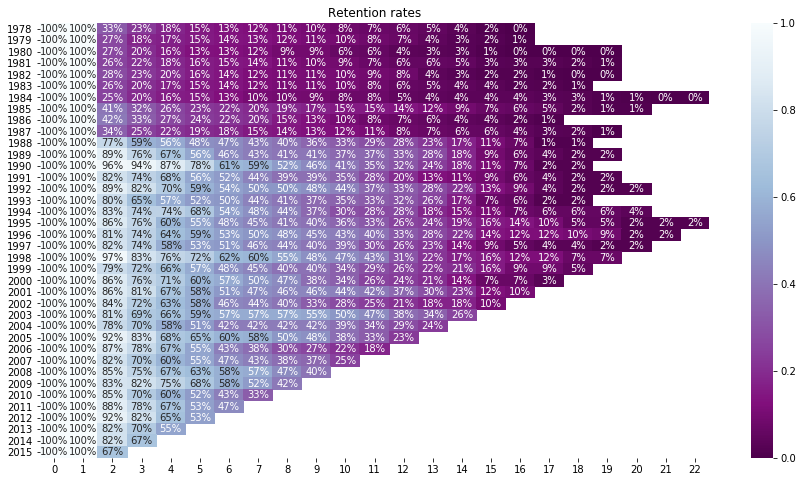

In [63]:
plt.figure(figsize=(15, 8))
plt.title('Conversion rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax =1,cmap="BuPu_r")
plt.show()

전화율을 분석해봤습니다. 